In [1]:
TRAIN_DIR = 'data/dev_data/dev_data/slider/train'
TEST_DIR = 'data/dev_data/dev_data/slider/test'
SAMPLE_RATE = 16000
DOWNSAMPLE_FACTOR = 10
RANDOM_STATE = 42

In [2]:
import os
import pandas as pd
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.spatial.distance import cosine, euclidean
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objs as go

In [3]:
XTRdic = dict()
for file_name in os.listdir(TRAIN_DIR):
    file_path = os.path.join(TRAIN_DIR, file_name)
    _, audio_data = wavfile.read(file_path)
    id = file_name.split('_')[2]
    if id in XTRdic:
        XTRdic[id].append(np.array(audio_data[::DOWNSAMPLE_FACTOR]))
    else:
        XTRdic[id] = [audio_data[::DOWNSAMPLE_FACTOR]]

In [4]:
from sklearn.model_selection import train_test_split

XTEdic = dict()
yTEdic = dict()
for file_name in os.listdir(TEST_DIR):
    file_path = os.path.join(TEST_DIR, file_name)
    _, audio_data = wavfile.read(file_path)
    parts = file_name.split('_')
    id = parts[2]
    label = 1 if parts[0] == 'anomaly' else 0
    if id in XTEdic:
        XTEdic[id].append(np.array(audio_data[::DOWNSAMPLE_FACTOR]))
        yTEdic[id].append(label)
    else:
        XTEdic[id] = [audio_data[::DOWNSAMPLE_FACTOR]]
        yTEdic[id] = [label]

XTEdicval = dict()
yTEdicval = dict()
XTEdictest = dict()
yTEdictest = dict()

for id in XTEdic:
    XTEdicval[id], XTEdictest[id], yTEdicval[id], yTEdictest[id] = train_test_split(XTEdic[id], yTEdic[id], test_size=0.2, random_state=RANDOM_STATE)

XTEdic = XTEdicval
yTEdic = yTEdicval

In [28]:
ids = sorted(XTRdic.keys())
for id in ids:
    XTRdic[id] = np.vstack(XTRdic[id])
    XTEdic[id] = np.vstack(XTEdic[id])
    yTEdic[id] = np.array(yTEdic[id])
    XTEdictest[id] = np.vstack(XTEdictest[id])
    yTEdictest[id] = np.array(yTEdictest[id])

In [6]:
import librosa

def estimate_pitch(audio_data):
    # Estimate pitch using librosa
    pitches, magnitudes = librosa.piptrack(y=audio_data.astype(float), sr=SAMPLE_RATE/DOWNSAMPLE_FACTOR)
    
    return pitches

def pitch_similarity(pitches1, pitches2):
    # Compute Euclidean distance between pitch values
    distance = np.linalg.norm(pitches1 - pitches2)
    
    # Convert distance to similarity score (e.g., inverse)
    similarity = 1 / (1 + distance)
    
    return similarity

def correlation(signal1, signal2):
    return np.mean(np.abs(signal1*signal2))

def compute_mfcc(audio_data, n_mfcc=13):
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data.astype(float), sr=SAMPLE_RATE/DOWNSAMPLE_FACTOR, n_mfcc=n_mfcc)
    
    return mfccs

def mfcc_distance(mfcc1, mfcc2):
    distance = euclidean(mfcc1.flatten(), mfcc2.flatten())
    return distance

def fft_distance(signal1, signal2):
    distance = euclidean(signal1.flatten(), signal2.flatten())
    return distance

In [7]:
# for id in ids:
#     XTR = XTRdic[id]
#     XTRmean = np.mean(XTR, axis=0)
#     mfcc = compute_mfcc(XTRmean)
#     fft = np.fft.fft(XTRmean)
#     # avg = fft.mean()

#     print(XTRmean.shape)

#     scores = []
#     for i in range(len(XTR)):
#         corr = correlation(XTR[i,:], XTRmean)
#         md = mfcc_distance(compute_mfcc(XTR[i,:]), mfcc)
#         thisfft = np.fft.fft(XTR[i,:])
#         fd = fft_distance(thisfft, fft)
#         # fa = avg - thisfft.mean()
#         peaks, _ = find_peaks(XTR[i,:])
#         scores.append([corr, md, fd])
#     scores = np.array(scores)
#     print(scores.shape)
    
#     # Convert scores to numpy array for easier manipulation
#     scores = np.array(scores)

#     # Separate the two dimensions
#     x = scores[:, 0]
#     y = scores[:, 1]
#     z = scores[:, 2]

#     #     colors = np.where(yTE == 0, 'red', 'blue')
    
#     # Create a trace
#     trace = go.Scatter3d(
#         x=x,
#         y=y,
#         z=z,
#         mode='markers',
#         marker=dict(
#             size=3,
#             color=z,                # Color by z value
#             colorscale='Viridis',   # Set color scale
#             opacity=0.8
#         )
#     )
#     # Create layout
#     layout = go.Layout(
#     margin=dict(l=0, r=0, b=0, t=0),
#     scene=dict(
#             xaxis=dict(title='X'),
#             yaxis=dict(title='Y'),
#             zaxis=dict(title='Z'),
#         )
#     )
#     # Create figure
#     fig = go.Figure(data=[trace], layout=layout)

#     # Show plot
#     fig.show()


#     # Create scatter plot
#     # plt.scatter(score1, score2, c=colors)
#     # plt.xlabel('Score 1')
#     # plt.ylabel('Score 2')
#     # plt.title('Scatter Plot of Scores')
#     # plt.show()

(16000,)
(364, 16000)
(364, 2) (364,)
(16000,)
(293, 16000)
(293, 2) (293,)
(16000,)
(222, 16000)
(222, 2) (222,)


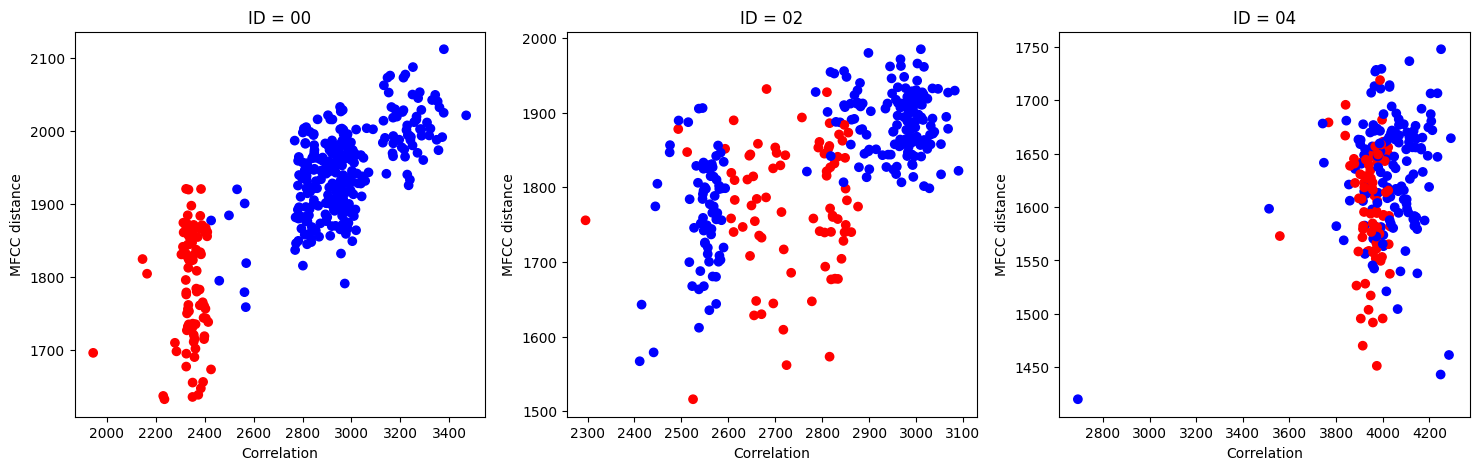

In [8]:
# fig, ax = plt.subplots(1, 3, figsize=(18, 5))
# idx = 0
# for id in ids:
#     XTR = np.mean(XTRdic[id], axis=0)
#     mfcc = compute_mfcc(XTR)
#     fft = np.fft.fft(XTR)
#     avg = fft.mean()
#     XTE = XTEdic[id]
#     yTE = yTEdic[id]

#     print(XTR.shape)
#     print(XTE.shape)

#     scores = []
#     for i in range(len(XTE)):
#         # thisfft = np.fft.fft(XTE[i,:])
#         # dist0 = thisfft.T @ thisfft
#         # dist0 = dist0*np.conj(dist0)
#         # fa = thisfft.mean()
#         corr = correlation(XTR, XTE[i,:])
#         md = mfcc_distance(compute_mfcc(XTE[i,:]), mfcc)
#         thisfft = np.fft.fft(XTE[i,:])
#         fd = fft_distance(thisfft, fft)
#         fa = avg - thisfft.mean()
        
#         peaks, _ = find_peaks(np.abs(np.clip(thisfft-fft, 0, None)), height=40000)
#         scores.append([corr, md])
#     scores = np.array(scores)
#     print(scores.shape, yTE.shape)
    
#     # Convert scores to numpy array for easier manipulation
#     scores = np.array(scores)

#     # # Separate the two dimensions
#     # x = scores[:, 0]
#     # y = scores[:, 1]
#     # z = scores[:, 2]
    
#     # # Filter scores based on class
#     # scores_red = scores[yTE == 0]
#     # scores_blue = scores[yTE == 1]
    
#     # # Define colors for the classes (assuming yTE is defined)
#     # colors = np.where(yTE == 0, 'red', 'blue')
    
#     # # Create a trace
#     # trace = go.Scatter3d(
#     #     x=x,
#     #     y=y,
#     #     z=z,
#     #     mode='markers',
#     #     marker=dict(
#     #         size=3,
#     #         color=colors,                # Color by z value
#     #         colorscale='Viridis',   # Set color scale
#     #         opacity=0.8
#     #     ),
#     # )
#     # # Create layout
#     # layout = go.Layout(
#     # margin=dict(l=0, r=0, b=0, t=0),
#     # scene=dict(
#     #         xaxis=dict(title='X'),
#     #         yaxis=dict(title='Y'),
#     #         zaxis=dict(title='Z'),
#     #     )
#     # )
#     # # Create figure
#     # fig = go.Figure(data=[trace], layout=layout)

#     # # Show plot
#     # fig.show()
    
#     colors = np.where(yTE == 0, 'red', 'blue')

#     ax[idx].scatter(scores[:,0], scores[:,1], c=colors, label=colors)
#     ax[idx].set_xlabel('Correlation')
#     ax[idx].set_ylabel('MFCC distance')
#     ax[idx].set_title(f'ID = {id}')
        
#     idx += 1

# plt.show()

In [9]:
XTRfeatures = dict()
XTRmeans = dict()

for id in ids:
    print(f'Processing {id}')
    XTR = XTRdic[id]
    XTRmean = np.mean(XTR, axis=0)
    mfcc = compute_mfcc(XTRmean)
    fft = np.fft.fft(XTRmean)
    avg = fft.mean()
    pitches = estimate_pitch(XTRmean)

    features = []
    for i in range(len(XTR)):
        corr = correlation(XTR[i,:], XTRmean)
        md = mfcc_distance(compute_mfcc(XTR[i,:]), mfcc)
        thisfft = np.fft.fft(XTR[i,:])
        fd = fft_distance(thisfft, fft)
        fa = avg - thisfft.mean()
        thispitches = estimate_pitch(XTR[i,:])
        ps = pitch_similarity(pitches, thispitches)
        peaks, _ = find_peaks(XTR[i,:])
        features.append([corr, md, fd, fa.real, fa.imag, ps, len(peaks)])
    
    XTRfeatures[id] = np.array(features)
    XTRmeans[id] = {
        'mean': XTRmean,
        'mfcc': mfcc,
        'fft': fft,
        'avgfft-real': avg.real,
        'avgfft-imag': avg.imag,
        'pitches': pitches
    }

Processing 00
Processing 02
Processing 04


In [10]:
display([x['mean'] for x in XTRmeans.values()])

[array([-10.55681818, -14.15702479,  -3.49173554, ...,   9.30785124,
          7.38119835,  -6.81404959]),
 array([-14.96900826,  -6.60227273,   3.48243802, ...,  -5.09917355,
         -2.07334711,   7.5857438 ]),
 array([-18.66359447,  16.57142857, -16.35253456, ...,  -2.73502304,
         -1.64285714, -13.62442396])]

In [11]:
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import multivariate_normal

# scalers = dict()
# gaussians = dict()
# thresholds = dict()

# for id in ids:
#     print(f'Processing {id}')
#     XTR = XTRfeatures[id]
    
#     scaler = StandardScaler()
#     XTRscaled = scaler.fit_transform(XTR)
#     scalers[id] = scaler

#     # Estimate mean and covariance matrix from normalized data
#     mean = np.mean(XTRscaled, axis=0)
#     covariance_matrix = np.cov(XTRscaled, rowvar=False)

#     gaussian_distribution = multivariate_normal(mean=mean, cov=covariance_matrix)
#     gaussians[id] = gaussian_distribution

#     log_likelihoods = gaussian_distribution.logpdf(XTRscaled)
#     log_likelihoods.sort()
#     threshold = log_likelihoods[int(0.1*len(log_likelihoods))]
#     thresholds[id] = threshold

In [12]:
# loglikelihoods = dict()

# for id in ids:
#     print(f'Processing {id}')
#     XTE = XTEdic[id]
#     yTE = yTEdic[id]
    
#     features = []
#     for i in range(len(XTE)):
#         thisfft = np.fft.fft(XTE[i,:])
#         pc = phase_correlation(XTE[i,:], XTRmeans[id]['mean'])
#         md = mfcc_distance(compute_mfcc(XTE[i,:]), XTRmeans[id]['mfcc'])
#         fd = fft_distance(thisfft, XTRmeans[id]['fft'])
#         fa = XTRmeans[id]['avgfft-real'] - thisfft.mean()
#         peaks, _ = find_peaks(XTE[i,:])
#         features.append([pc, md, fd, fa.real, fa.imag, len(peaks)])
    
#     XTEfeatures = np.array(features)

#     # Normalize test data using the same scaler
#     XTEscaled = scalers[id].transform(XTEfeatures)

#     # Compute log-likelihood of the test data
#     log_likelihood = gaussians[id].logpdf(XTEscaled)
#     loglikelihoods[id] = log_likelihood

In [13]:
# from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# for id in ids:
#     threshold = thresholds[id]
#     yTE = yTEdic[id]
#     colors = np.where(yTE == 0, 'red', 'blue')
#     print(f'Processing {id}')
#     log_likelihood = loglikelihoods[id]
#     # Create a scatter plot
#     plt.scatter(range(len(log_likelihood)), log_likelihood, c=colors)

#     # Add labels and title
#     plt.xlabel('Sample')
#     plt.ylabel('Log-Likelihood')
#     plt.title('Scatter Plot of Log-Likelihoods')

#     # Show the plot
#     plt.show()

#     ypred = np.where(log_likelihood > threshold, 1, 0)
#     accuracy = accuracy_score(yTE, ypred)
#     auc = roc_auc_score(yTE, ypred)
#     conf_mat = confusion_matrix(yTE, ypred)
#     # Extract TN, FP, FN, TP from confusion matrix
#     TN, FP, FN, TP = conf_mat.ravel()
#     # Compute False Positive Rate (FPR)
#     fpr = FP / (FP + TN)
#     # Compute False Negative Rate (FNR)
#     fnr = FN / (FN + TP)

#     print(f'AUC: {auc:.2f}')
#     print(f'Accuracy: {accuracy:.2f}')
#     print(f'FPR: {fpr:.2f}')
#     print(f'FNR: {fnr:.2f}')
#     print('Confusion Matrix:')
#     print(conf_mat)

In [29]:
from sklearn.preprocessing import StandardScaler

XTRfinal = dict()
XTEfinal = dict()
XTEtestfinal = dict()

for id in ids:
    print(f'Processing {id}')
    XTR = XTRfeatures[id]
    scaler = StandardScaler()
    XTRscaled = scaler.fit_transform(XTR)

    XTE = XTEdic[id]
    yTE = yTEdic[id]
    XTEtest = XTEdictest[id]
    yTEtest = yTEdictest[id]
    features = []

    for i in range(len(XTE)):
        thisfft = np.fft.fft(XTE[i,:])
        corr = correlation(XTRmeans[id]['mean'], XTE[i,:])
        md = mfcc_distance(compute_mfcc(XTE[i,:]), XTRmeans[id]['mfcc'])
        fd = fft_distance(thisfft, XTRmeans[id]['fft'])
        thisfftmean = thisfft.mean()
        fare = XTRmeans[id]['avgfft-real'] - thisfftmean.real
        faim = XTRmeans[id]['avgfft-imag'] - thisfftmean.imag
        peaks, _ = find_peaks(XTE[i,:])
        thispitches = estimate_pitch(XTE[i,:])
        ps = pitch_similarity(XTRmeans[id]['pitches'], thispitches)
        features.append([corr, md, fd, fare, faim, ps, len(peaks)])
    
    XTEfeatures = np.array(features)

    features = []
    for i in range(len(XTEtest)):
        thisfft = np.fft.fft(XTEtest[i,:])
        corr = correlation(XTRmeans[id]['mean'], XTEtest[i,:])
        md = mfcc_distance(compute_mfcc(XTEtest[i,:]), XTRmeans[id]['mfcc'])
        fd = fft_distance(thisfft, XTRmeans[id]['fft'])
        thisfftmean = thisfft.mean()
        fare = XTRmeans[id]['avgfft-real'] - thisfftmean.real
        faim = XTRmeans[id]['avgfft-imag'] - thisfftmean.imag
        peaks, _ = find_peaks(XTEtest[i,:])
        thispitches = estimate_pitch(XTEtest[i,:])
        ps = pitch_similarity(XTRmeans[id]['pitches'], thispitches)
        features.append([corr, md, fd, fare, faim, ps, len(peaks)])
    
    XTEtestfeatures = np.array(features)

    # Normalize test data using the same scaler
    XTEscaled = scaler.transform(XTEfeatures)
    XTEtestscaled = scaler.transform(XTEtestfeatures)
    
    XTRfinal[id] = XTRscaled
    XTEfinal[id] = XTEscaled
    XTEtestfinal[id] = XTEtestscaled

Processing 00
Processing 02
Processing 04


array([[ 1.00042212,  0.08254243,  0.65995908,  0.0184816 , -0.01116386,
         0.27739473, -0.05453289],
       [ 0.08254243,  1.00042212,  0.04132295,  0.00166041,  0.01758188,
        -0.81622299,  0.1409014 ],
       [ 0.65995908,  0.04132295,  1.00042212, -0.00265355, -0.03687934,
         0.17629187, -0.08924729],
       [ 0.0184816 ,  0.00166041, -0.00265355,  1.00042212, -0.01337028,
        -0.00344886, -0.00865811],
       [-0.01116386,  0.01758188, -0.03687934, -0.01337028,  1.00042212,
        -0.01052937,  0.00805729],
       [ 0.27739473, -0.81622299,  0.17629187, -0.00344886, -0.01052937,
         1.00042212, -0.26849532],
       [-0.05453289,  0.1409014 , -0.08924729, -0.00865811,  0.00805729,
        -0.26849532,  1.00042212]])

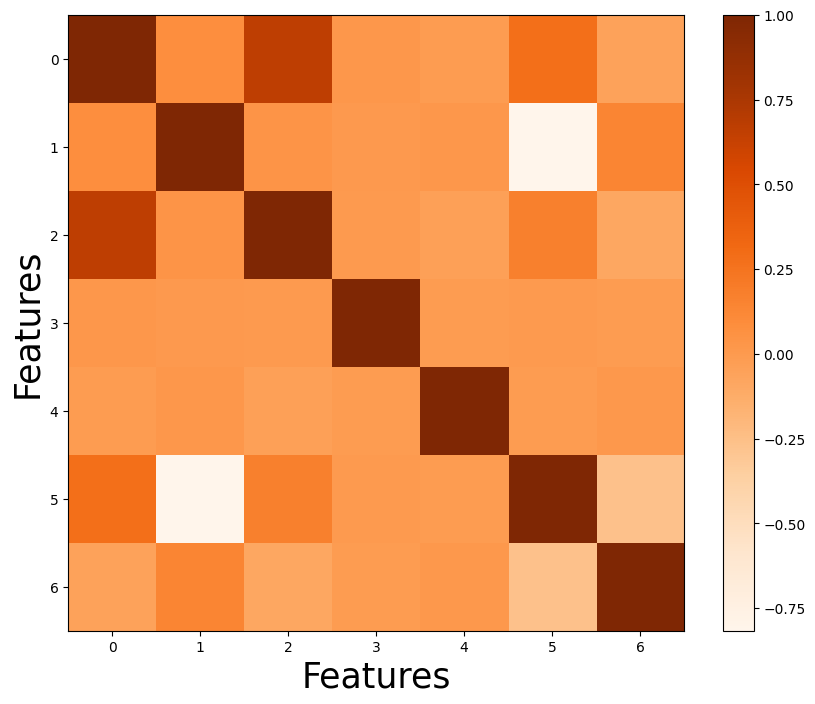

In [15]:
XTR = np.vstack([XTRfinal[id] for id in ids])
import matplotlib.pyplot as plt

# Calculate the covariance matrix
cov_matrix = np.cov(XTR.T)

display(cov_matrix)
# Plot the covariance matrix
plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, cmap='Oranges', interpolation='nearest')
plt.colorbar()
plt.xlabel('Features', fontdict={'fontsize': 25})
plt.ylabel('Features', fontdict={'fontsize': 25})
plt.show()

>>>>>     PCA(2) | GMM components: 8 | Covariance: full     <<<<<
AUC: 0.957, F1-score: 0.924, Accuracy: 0.896, FPR: 0.068, FNR: 0.117


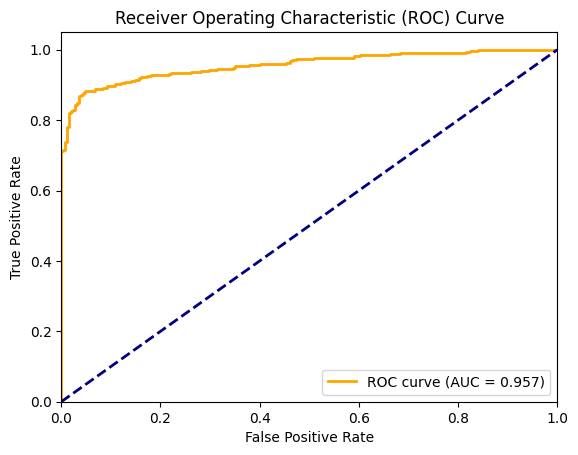

In [40]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, f1_score

best_gmm = None
best_auc = 0

nums_components = [8]
pcas = [2]
covariances = ['full']
# percentages = [0.02, 0.05, 0.08, 0.1]
percentage = 0.05

for pca_dims in pcas:
    for n_components in nums_components:
        for cov in covariances:
            print(f'>>>>>     PCA({pca_dims}) | GMM components: {n_components} | Covariance: {cov}     <<<<<')

            yTEtotal = []
            ypredtotal = []
            scorestotal = []
            models = dict()
            for id in ids:
                XTR = XTRfinal[id]
                XTE = XTEfinal[id]
                yTE = yTEdic[id]

                pca = PCA(n_components=pca_dims)
                XTR = pca.fit_transform(XTR)
                XTE = pca.transform(XTE)
                # if pca_dims == 2:
                #     covar = np.cov(XTR.T)
                #     print(covar)

                gmm = GaussianMixture(n_components=n_components, max_iter=10000, covariance_type=cov, random_state=42)
                gmm.fit(XTR)
                log_likelihoods = 1-gmm.score_samples(XTR)
                log_likelihoods.sort()
                threshold = log_likelihoods[int((1-percentage)*len(log_likelihoods))]

                test_scores = 1-gmm.score_samples(XTE)
                ypred = test_scores > threshold

                yTEtotal.extend(yTE)
                ypredtotal.extend(ypred)
                scorestotal.extend(test_scores)

                accuracy = accuracy_score(yTE, ypred)
                auc = roc_auc_score(yTE, test_scores)
                f1 = f1_score(yTE, ypred)
                conf_mat = confusion_matrix(yTE, ypred)
                TN, FP, FN, TP = conf_mat.ravel()
                fpr = FP / (FP + TN)
                fnr = FN / (FN + TP)

                # print(f'ID: {id}, AUC: {auc:.3f}, F1-score: {f1:.3f}, Accuracy: {accuracy:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}')

                models[id] = gmm

            fprs, tprs, thresholds = roc_curve(yTEtotal, scorestotal)

            accuracy = accuracy_score(yTEtotal, ypredtotal)
            auc = roc_auc_score(yTEtotal, scorestotal)
            f1 = f1_score(yTEtotal, ypredtotal)
            conf_mat = confusion_matrix(yTEtotal, ypredtotal)
            TN, FP, FN, TP = conf_mat.ravel()
            fpr = FP / (FP + TN)
            fnr = FN / (FN + TP)

            print(f'AUC: {auc:.3f}, F1-score: {f1:.3f}, Accuracy: {accuracy:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}')

            # Plot the ROC curve
            plt.figure()
            plt.plot(fprs, tprs, color='orange', lw=2, label='ROC curve (AUC = %0.3f)' % auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            if auc > best_auc:
                best_auc = auc
                best_gmm = {
                    'pca': pca_dims,
                    'n_components': n_components,
                    'covariance': cov,
                    'model': models,
                    'auc': auc,
                }

In [35]:
print(best_auc)
display(best_gmm)

0.9565818830879071


{'pca': 2,
 'n_components': 16,
 'covariance': 'diag',
 'model': {'00': GaussianMixture(covariance_type='diag', max_iter=10000, n_components=16,
                  random_state=42),
  '02': GaussianMixture(covariance_type='diag', max_iter=10000, n_components=16,
                  random_state=42),
  '04': GaussianMixture(covariance_type='diag', max_iter=10000, n_components=16,
                  random_state=42)},
 'auc': 0.9565818830879071}

In [45]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, f1_score

nums_components = [8]
pcas = [2]
covariances = ['full']
percentage = 0.05

for pca_dims in pcas:
    for n_components in nums_components:
        for cov in covariances:
            print(f'>>>>>     PCA({pca_dims}) | GMM components: {n_components} | Covariance: {cov}     <<<<<')

            yTEtotal = []
            ypredtotal = []
            scorestotal = []
            models = dict()
            for id in ids:
                XTR = XTRfinal[id]
                XTE = XTEtestfinal[id]
                yTE = yTEdictest[id]

                pca = PCA(n_components=pca_dims)
                XTR = pca.fit_transform(XTR)
                XTE = pca.transform(XTE)
                # if pca_dims == 2:
                #     covar = np.cov(XTR.T)
                #     print(covar)

                gmm = GaussianMixture(n_components=n_components, max_iter=10000, covariance_type=cov, random_state=42)
                gmm.fit(XTR)
                log_likelihoods = 1-gmm.score_samples(XTR)
                log_likelihoods.sort()
                threshold = log_likelihoods[int((1-percentage)*len(log_likelihoods))]

                test_scores = 1-gmm.score_samples(XTE)
                ypred = test_scores > threshold

                yTEtotal.extend(yTE)
                ypredtotal.extend(ypred)
                scorestotal.extend(test_scores)

                accuracy = accuracy_score(yTE, ypred)
                auc = roc_auc_score(yTE, test_scores)
                f1 = f1_score(yTE, ypred)
                conf_mat = confusion_matrix(yTE, ypred)
                TN, FP, FN, TP = conf_mat.ravel()
                fpr = FP / (FP + TN)
                fnr = FN / (FN + TP)

                # print(f'ID: {id}, AUC: {auc:.3f}, F1-score: {f1:.3f}, Accuracy: {accuracy:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}')

                models[id] = gmm

            fprs, tprs, thresholds = roc_curve(yTEtotal, scorestotal)

            accuracy = accuracy_score(yTEtotal, ypredtotal)
            auc = roc_auc_score(yTEtotal, scorestotal)
            f1 = f1_score(yTEtotal, ypredtotal)
            conf_mat = confusion_matrix(yTEtotal, ypredtotal)
            TN, FP, FN, TP = conf_mat.ravel()
            fpr = FP / (FP + TN)
            fnr = FN / (FN + TP)

            print(f'AUC: {auc:.3f}, F1-score: {f1:.3f}, Accuracy: {accuracy:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}')

            # # Plot the ROC curve
            # plt.figure()
            # plt.plot(fprs, tprs, color='orange', lw=2, label='ROC curve (AUC = %0.3f)' % auc)
            # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            # plt.xlim([0.0, 1.0])
            # plt.ylim([0.0, 1.05])
            # plt.xlabel('False Positive Rate')
            # plt.ylabel('True Positive Rate')
            # plt.title('Receiver Operating Characteristic (ROC) Curve')
            # plt.legend(loc="lower right")
            # plt.show()

            if auc > best_auc:
                best_auc = auc
                best_gmm = {
                    'pca': pca_dims,
                    'n_components': n_components,
                    'covariance': cov,
                    'model': models,
                    'auc': auc,
                }

>>>>>     PCA(2) | GMM components: 8 | Covariance: full     <<<<<
AUC: 0.967, F1-score: 0.933, Accuracy: 0.901, FPR: 0.059, FNR: 0.111


>>>>>     PCA(2), nu=0.1, gamma=0.001     <<<<<
AUC: 0.944, F1-score: 0.764, Accuracy: 0.726, FPR: 0.004, FNR: 0.381


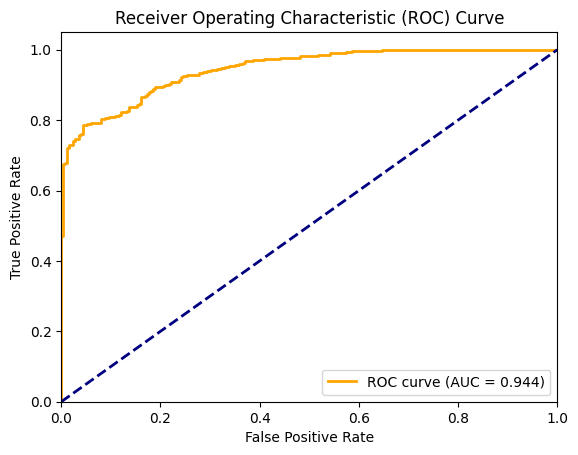

>>>>>     PCA(2), nu=0.1, gamma=0.01     <<<<<
AUC: 0.947, F1-score: 0.872, Accuracy: 0.834, FPR: 0.048, FNR: 0.213


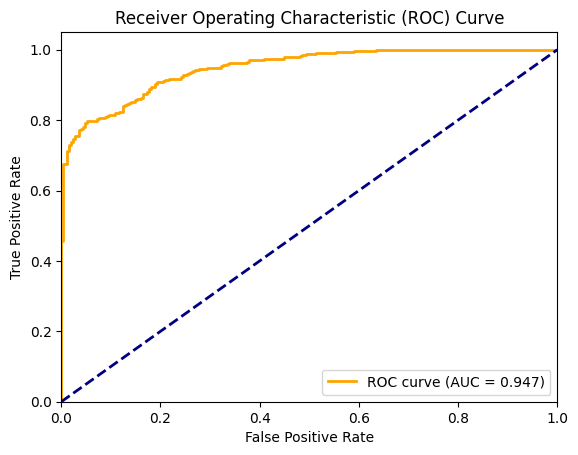

>>>>>     PCA(2), nu=0.1, gamma=0.1     <<<<<
AUC: 0.964, F1-score: 0.920, Accuracy: 0.892, FPR: 0.056, FNR: 0.129


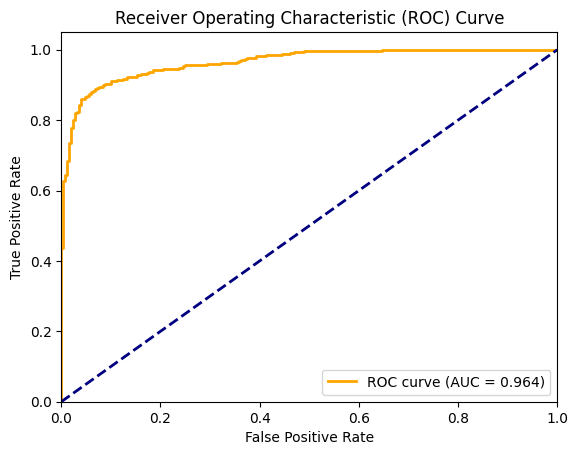

>>>>>     PCA(2), nu=0.3, gamma=0.001     <<<<<
AUC: 0.940, F1-score: 0.880, Accuracy: 0.841, FPR: 0.100, FNR: 0.183


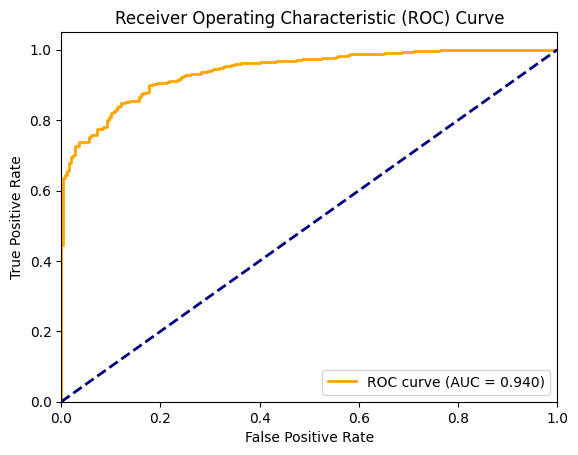

>>>>>     PCA(2), nu=0.3, gamma=0.01     <<<<<
AUC: 0.941, F1-score: 0.914, Accuracy: 0.875, FPR: 0.269, FNR: 0.068


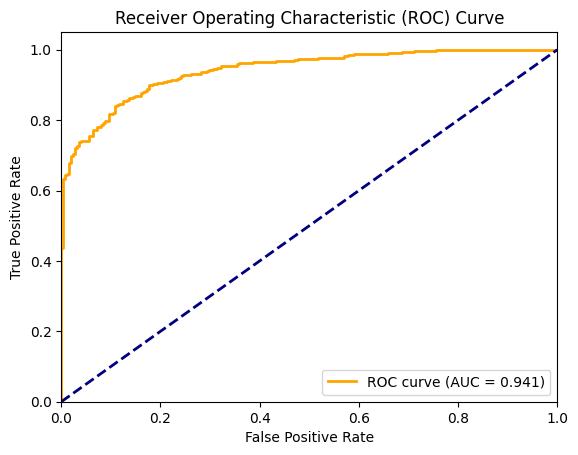

>>>>>     PCA(2), nu=0.3, gamma=0.1     <<<<<
AUC: 0.948, F1-score: 0.916, Accuracy: 0.876, FPR: 0.281, FNR: 0.062


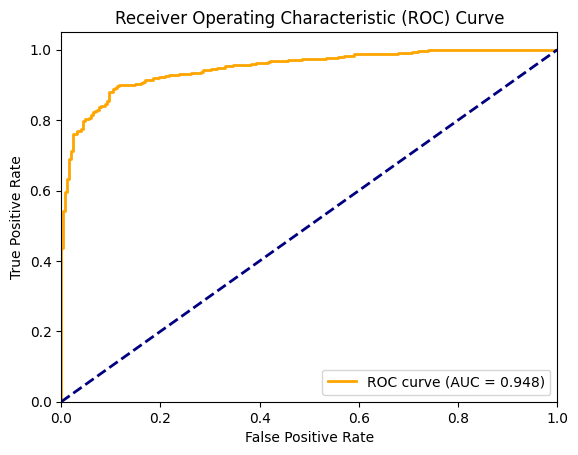

>>>>>     PCA(2), nu=0.5, gamma=0.001     <<<<<
AUC: 0.936, F1-score: 0.913, Accuracy: 0.875, FPR: 0.229, FNR: 0.084


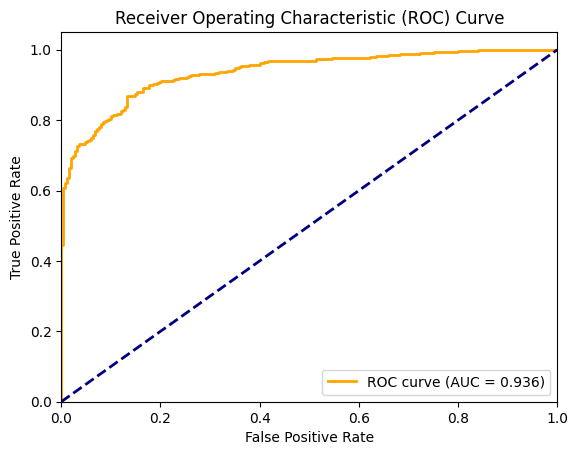

>>>>>     PCA(2), nu=0.5, gamma=0.01     <<<<<
AUC: 0.936, F1-score: 0.902, Accuracy: 0.849, FPR: 0.450, FNR: 0.033


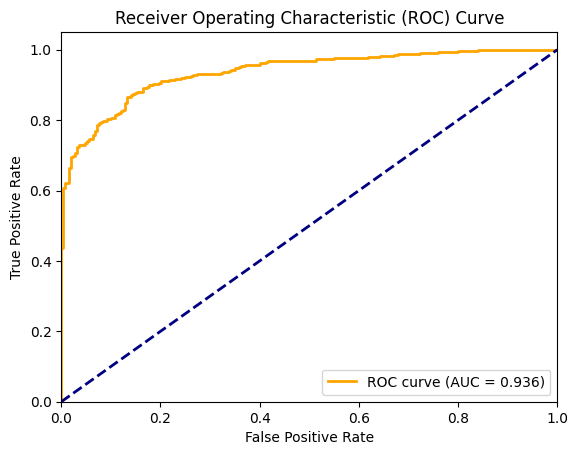

>>>>>     PCA(2), nu=0.5, gamma=0.1     <<<<<
AUC: 0.936, F1-score: 0.898, Accuracy: 0.843, FPR: 0.474, FNR: 0.032


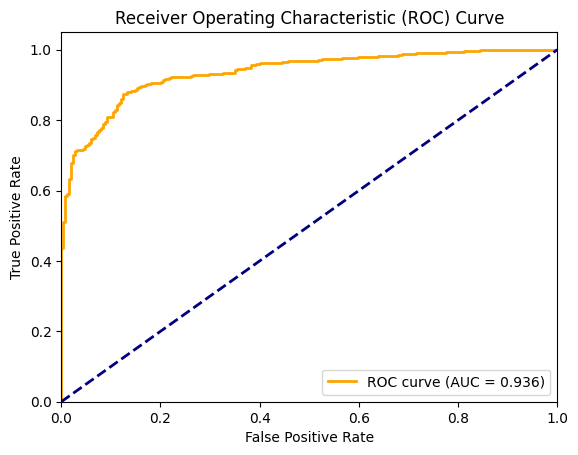

In [44]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, f1_score
from sklearn import svm

best_svm = None
best_auc = 0

pcas = [2]
nus = [0.1, 0.3, 0.5]
gammas = [1e-3, 1e-2, 1e-1]
threshold = 2

for nu in nus:
    for gamma in gammas:
        for pca_dims in pcas:
            print(f'>>>>>     PCA({pca_dims}), nu={nu}, gamma={gamma}     <<<<<')

            yTEtotal = []
            ypredtotal = []
            scorestotal = []

            models = dict()

            for id in ids:
                XTR = XTRfinal[id]
                XTE = XTEfinal[id]
                yTE = yTEdic[id]

                pca = PCA(n_components=pca_dims)
                XTR = pca.fit_transform(XTR)
                XTE = pca.transform(XTE)

                clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma, max_iter=10000)
                clf.fit(XTR)
                test_scores = 1-clf.decision_function(XTE)
                ypred = test_scores > threshold

                yTEtotal.extend(yTE)
                ypredtotal.extend(ypred)
                scorestotal.extend(test_scores)

                accuracy = accuracy_score(yTE, ypred)
                auc = roc_auc_score(yTE, test_scores)
                f1 = f1_score(yTE, ypred)
                conf_mat = confusion_matrix(yTE, ypred)
                TN, FP, FN, TP = conf_mat.ravel()
                fpr = FP / (FP + TN)
                fnr = FN / (FN + TP)

                # print(f'ID: {id}, AUC: {auc:.3f}, F1-score: {f1:.3f}, Accuracy: {accuracy:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}')

                models[id] = clf

            fprs, tprs, thresholds = roc_curve(yTEtotal, scorestotal)

            accuracy = accuracy_score(yTEtotal, ypredtotal)
            auc = roc_auc_score(yTEtotal, scorestotal)
            f1 = f1_score(yTEtotal, ypredtotal)
            conf_mat = confusion_matrix(yTEtotal, ypredtotal)
            TN, FP, FN, TP = conf_mat.ravel()
            fpr = FP / (FP + TN)
            fnr = FN / (FN + TP)

            print(f'AUC: {auc:.3f}, F1-score: {f1:.3f}, Accuracy: {accuracy:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}')

            # Plot the ROC curve
            plt.figure()
            plt.plot(fprs, tprs, color='orange', lw=2, label='ROC curve (AUC = %0.3f)' % auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            if auc > best_auc:
                best_auc = auc
                best_svm = {
                    'pca': pca_dims,
                    'nu': nu,
                    'gamma': gamma,
                    'model': models,
                    'auc': auc,
                }

In [19]:
print(best_auc)
display(best_svm)

0.9643845222158476


{'pca': 2,
 'nu': 0.1,
 'gamma': 0.1,
 'model': {'00': OneClassSVM(gamma=0.1, max_iter=10000, nu=0.1),
  '02': OneClassSVM(gamma=0.1, max_iter=10000, nu=0.1),
  '04': OneClassSVM(gamma=0.1, max_iter=10000, nu=0.1)},
 'auc': 0.9643845222158476}

>>>>>     PCA(2) | GMM components: 4 | Covariance: full     <<<<<
AUC: 0.954


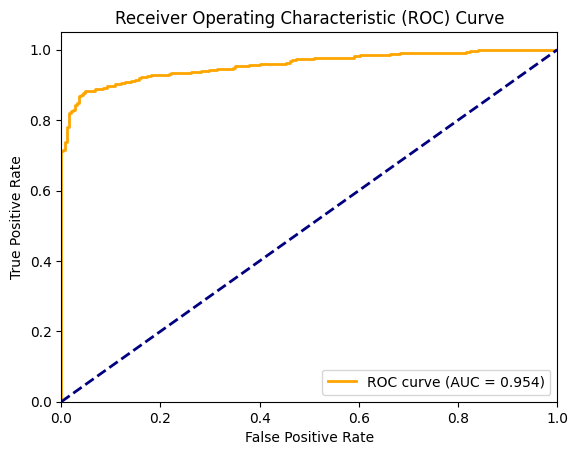

>>>>>     PCA(2) | GMM components: 4 | Covariance: diag     <<<<<
AUC: 0.946


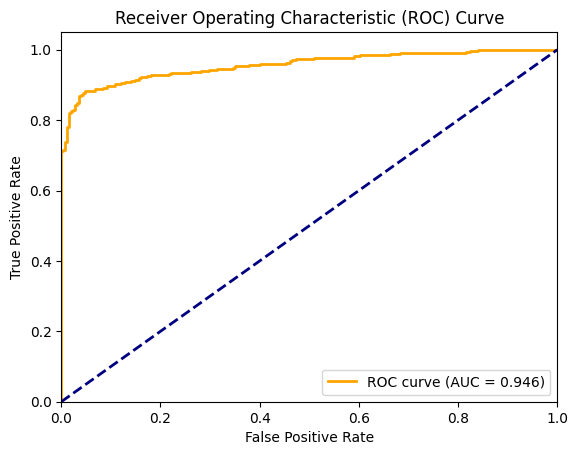

>>>>>     PCA(2) | GMM components: 8 | Covariance: full     <<<<<
AUC: 0.959


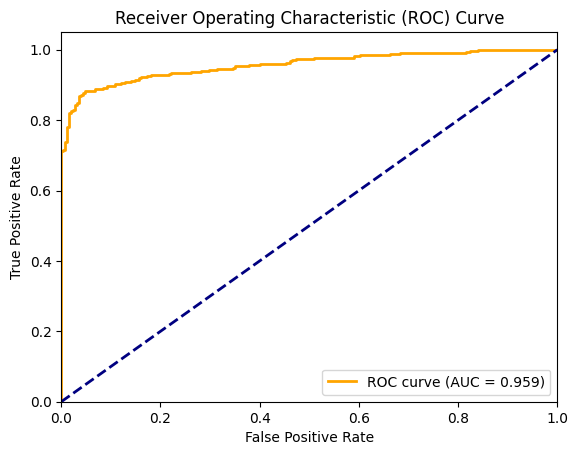

>>>>>     PCA(2) | GMM components: 8 | Covariance: diag     <<<<<
AUC: 0.958


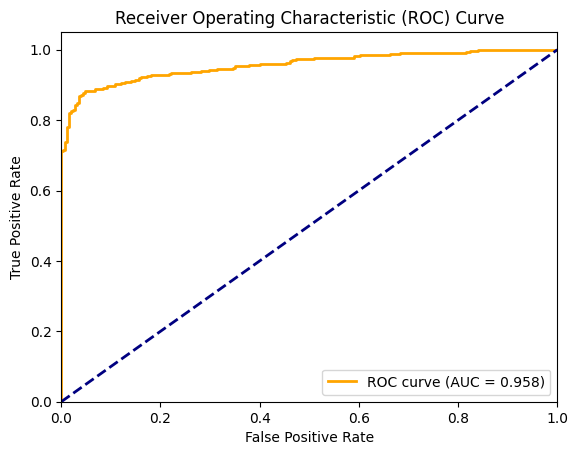

>>>>>     PCA(2) | GMM components: 16 | Covariance: full     <<<<<
AUC: 0.960


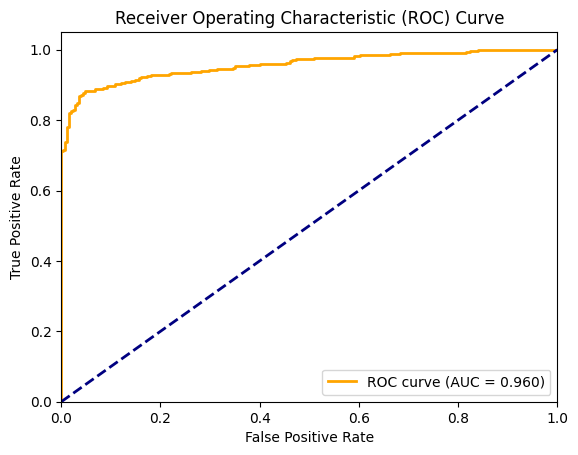

>>>>>     PCA(2) | GMM components: 16 | Covariance: diag     <<<<<
AUC: 0.960


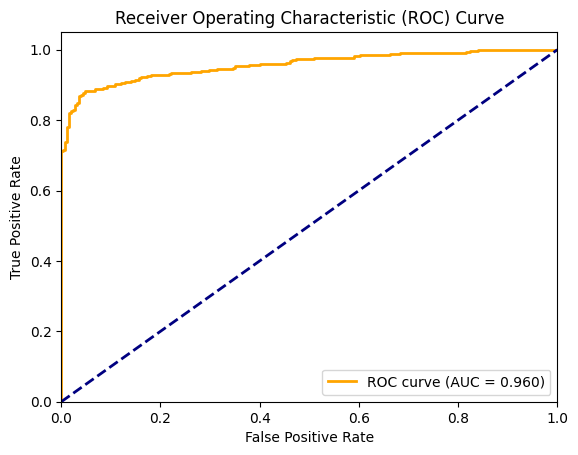

In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

best_auc = 0
best_gmm_all_ids= None

nums_components = [4, 8, 16]
pcas = [2]
covariances = ['full', 'diag']

for pca_dims in pcas:
    for n_components in nums_components:
        for cov in covariances:
            print(f'>>>>>     PCA({pca_dims}) | GMM components: {n_components} | Covariance: {cov}     <<<<<')
            XTR = np.vstack([XTRfinal[id] for id in ids])
            XTE = np.vstack([XTEfinal[id] for id in ids])
            yTE = np.hstack([yTEdic[id] for id in ids])

            pca = PCA(n_components=pca_dims)
            XTR = pca.fit_transform(XTR)
            XTE = pca.transform(XTE)

            gmm = GaussianMixture(n_components=n_components, random_state=RANDOM_STATE, max_iter=10000, covariance_type=cov)

            gmm.fit(XTR)

            if pca_dims == 2:
                import matplotlib.pyplot as plt

                # Extract X and y values
                XTE_x = XTE[:, 0]
                XTE_y = XTE[:, 1]
                yTE_colors = np.where(yTE == 0, 'red', 'blue')

                # # Create scatter plot
                # plt.scatter(XTE_y, XTE_x, c=yTE_colors, alpha=0.3)
                
                #  # Assuming gmm is the Gaussian Mixture Model object
                # means = gmm.means_

                # # Plot the scatter points
                # plt.scatter(means[:, 0], means[:, 1], c='green', marker='x', label='GMM Means')

                # # Add labels and title
                # plt.xlabel('XTE Dimension 1')
                # plt.ylabel('XTE Dimension 2')
                # plt.title('Scatter Plot of XTE 2D with Color based on yTE')

                # # Show the plot
                # plt.show()

            test_scores = 1-gmm.score_samples(XTE)
            auc = roc_auc_score(yTE, test_scores)
            print(f'AUC: {auc:.3f}')

            # Plot the ROC curve
            plt.figure()
            plt.plot(fprs, tprs, color='orange', lw=2, label='ROC curve (AUC = %0.3f)' % auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            if auc > best_auc:
                best_auc = auc
                best_gmm_all_ids = {
                    'pca': pca_dims,
                    'n_components': n_components,
                    'covariance': cov,
                    'gmm': gmm,
                    'auc': auc,
                }

In [21]:
print(best_auc)
display(best_gmm_all_ids)

model = best_gmm_all_ids['gmm']
means = model.means_
dists = []
mind = 1000
for i in range(len(means)):
    for j in range(i+1, len(means)):
        dists.append(euclidean(means[i], means[j]))
display(sorted(dists))

0.9603812073691593


{'pca': 2,
 'n_components': 16,
 'covariance': 'full',
 'gmm': GaussianMixture(max_iter=10000, n_components=16, random_state=42),
 'auc': 0.9603812073691593}

[0.47638765887420614,
 0.6245051000858352,
 0.6571404959728854,
 0.8039908968297964,
 0.8539489005039003,
 0.8628984174769109,
 0.8849013105475718,
 0.9752551944806923,
 0.9908429586939838,
 1.1613124196158624,
 1.1630799429942595,
 1.2119158440334472,
 1.4164831168441556,
 1.4226098101693418,
 1.4828972498291477,
 1.4952992372964082,
 1.496159431039156,
 1.595296171582496,
 1.6703543310901545,
 1.671923409755869,
 1.7280739265516296,
 1.818654569254108,
 1.8743282403167243,
 1.9010299684059835,
 1.9650555216202457,
 1.9948705178921815,
 2.0528070957750884,
 2.0630291930552582,
 2.1233661028904764,
 2.142493452602277,
 2.1539174710793114,
 2.168430288741853,
 2.2312079170567216,
 2.266369911130661,
 2.277016178727866,
 2.283111751525163,
 2.300312033747765,
 2.3351407681124683,
 2.3537636874210452,
 2.358340426794559,
 2.4071216197389353,
 2.4186389321092476,
 2.4678200366482126,
 2.4682131643579805,
 2.5128375971754724,
 2.5183351156707863,
 2.579865523128038,
 2.5855580566123524,
 2.

>>>>>     PCA(2), nu=0.1, gamma=0.001     <<<<<
AUC: 0.939


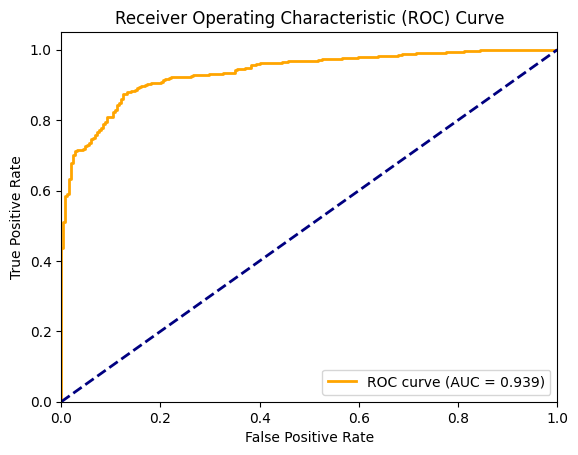

>>>>>     PCA(2), nu=0.1, gamma=0.01     <<<<<
AUC: 0.941


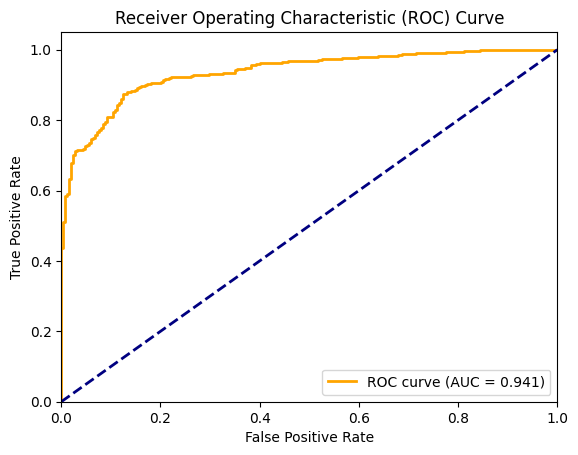

>>>>>     PCA(2), nu=0.1, gamma=0.1     <<<<<
AUC: 0.954


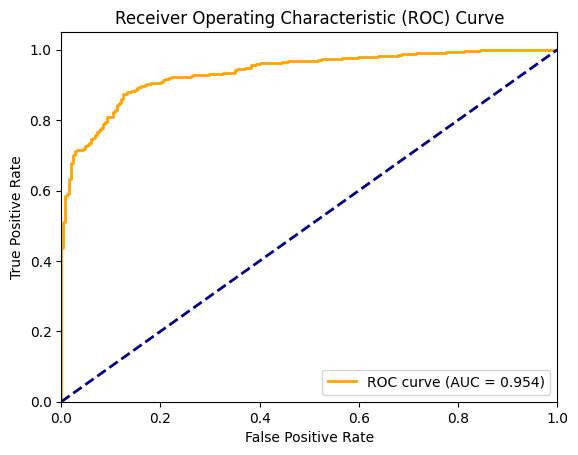

>>>>>     PCA(2), nu=0.3, gamma=0.001     <<<<<
AUC: 0.940


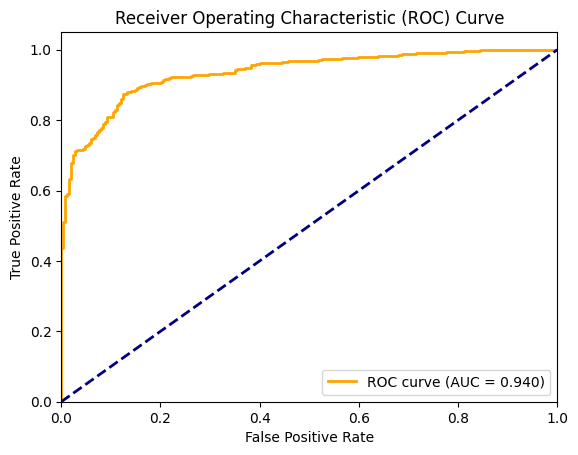

>>>>>     PCA(2), nu=0.3, gamma=0.01     <<<<<
AUC: 0.941


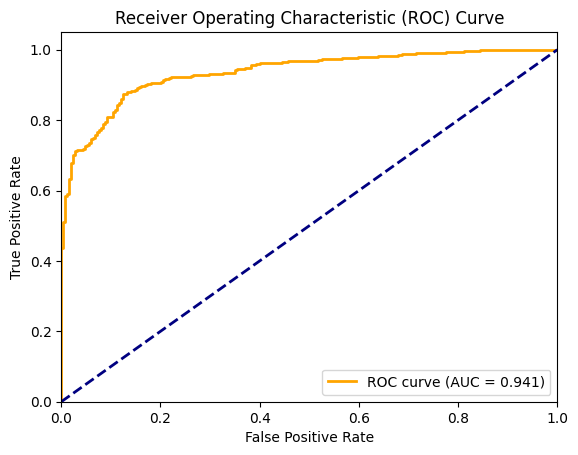

>>>>>     PCA(2), nu=0.3, gamma=0.1     <<<<<
AUC: 0.951


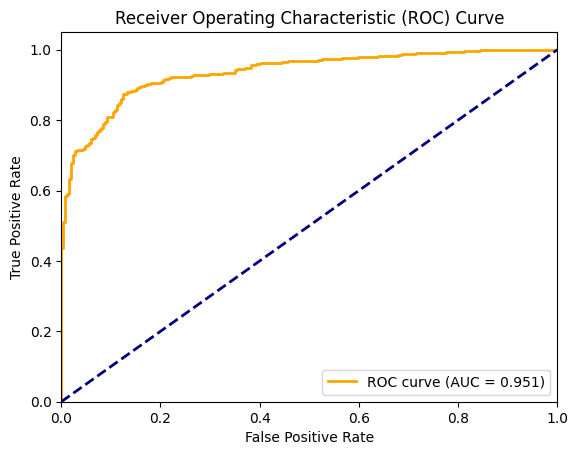

>>>>>     PCA(2), nu=0.5, gamma=0.001     <<<<<
AUC: 0.940


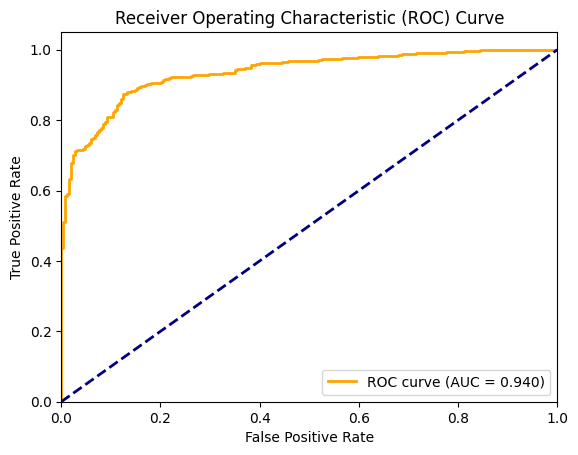

>>>>>     PCA(2), nu=0.5, gamma=0.01     <<<<<
AUC: 0.940


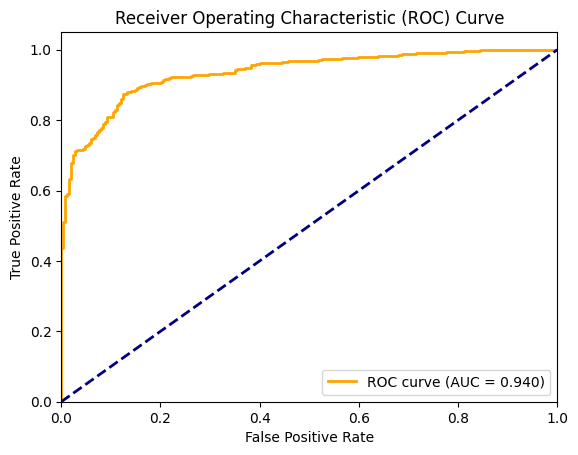

>>>>>     PCA(2), nu=0.5, gamma=0.1     <<<<<
AUC: 0.945


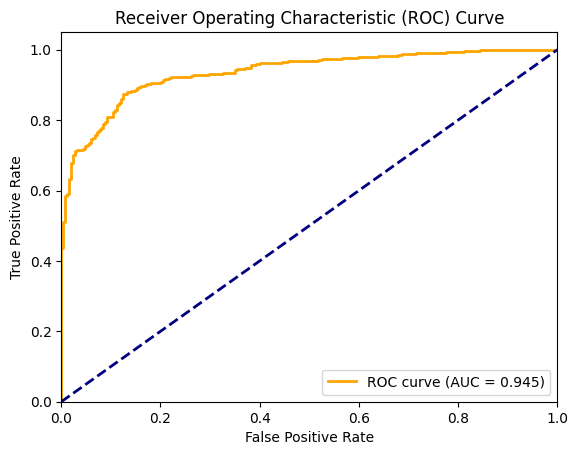

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, f1_score
from sklearn import svm

best_auc = 0
best_svm_all_ids = None

pcas = [2]
nus = [0.1, 0.3, 0.5]
gammas = [1e-3, 1e-2, 1e-1]
threshold = 2

for nu in nus:
    for gamma in gammas:
        for pca_dims in pcas:
            print(f'>>>>>     PCA({pca_dims}), nu={nu}, gamma={gamma}     <<<<<')
            XTR = np.vstack([XTRfinal[id] for id in ids])
            XTE = np.vstack([XTEfinal[id] for id in ids])
            yTE = np.hstack([yTEdic[id] for id in ids])

            pca = PCA(n_components=pca_dims)
            XTR = pca.fit_transform(XTR)
            XTE = pca.transform(XTE)

            clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma, max_iter=10000)
            clf.fit(XTR)
            test_scores = 1-clf.decision_function(XTE)
            auc = roc_auc_score(yTE, test_scores)
            
            print(f'AUC: {auc:.3f}')

            # Plot the ROC curve
            plt.figure()
            plt.plot(fprs, tprs, color='orange', lw=2, label='ROC curve (AUC = %0.3f)' % auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            if auc > best_auc:
                best_auc = auc
                best_svm_all_ids = {
                    'pca': pca_dims,
                    'nu': nu,
                    'gamma': gamma,
                    'clf': clf,
                    'auc': auc,
                }

In [23]:
print(best_auc)
display(best_svm_all_ids)

0.9535156499011921


{'pca': 2,
 'nu': 0.1,
 'gamma': 0.1,
 'clf': OneClassSVM(gamma=0.1, max_iter=10000, nu=0.1),
 'auc': 0.9535156499011921}

>>>>>     PCA(2), nu=0.1, gamma=0.1     <<<<<
AUC: 0.952


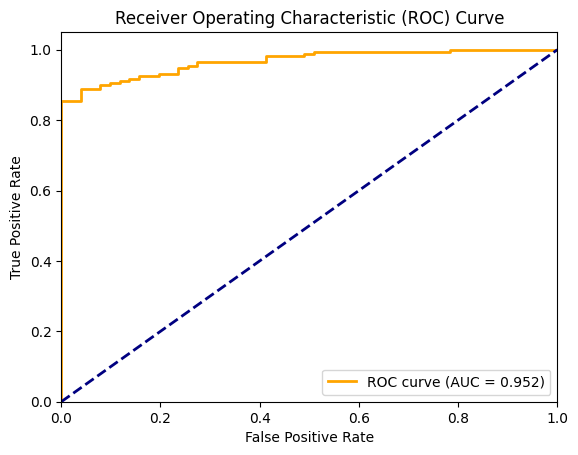

In [46]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, f1_score
from sklearn import svm

best_auc = 0
best_svm_all_ids = None

pcas = [2]
nus = [0.1]
gammas = [1e-1]
threshold = 2

for nu in nus:
    for gamma in gammas:
        for pca_dims in pcas:
            print(f'>>>>>     PCA({pca_dims}), nu={nu}, gamma={gamma}     <<<<<')
            XTR = np.vstack([XTRfinal[id] for id in ids])
            XTE = np.vstack([XTEtestfinal[id] for id in ids])
            yTE = np.hstack([yTEdictest[id] for id in ids])

            pca = PCA(n_components=pca_dims)
            XTR = pca.fit_transform(XTR)
            XTE = pca.transform(XTE)

            clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma, max_iter=10000)
            clf.fit(XTR)
            test_scores = 1-clf.decision_function(XTE)
            auc = roc_auc_score(yTE, test_scores)
            
            print(f'AUC: {auc:.3f}')

            # Plot the ROC curve
            plt.figure()
            plt.plot(fprs, tprs, color='orange', lw=2, label='ROC curve (AUC = %0.3f)' % auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            if auc > best_auc:
                best_auc = auc
                best_svm_all_ids = {
                    'pca': pca_dims,
                    'nu': nu,
                    'gamma': gamma,
                    'clf': clf,
                    'auc': auc,
                }